Parte 1 (imágenes en `/white_patch` y `/coord_cromaticas`):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [144]:
# Importamos las librerias que vamos a utilizar
%matplotlib inline

import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [145]:
def mostrar_img_bgr(img):
    plt.imshow(img[...,::-1])
    plt.axis("off")
    plt.show()

In [154]:
def coord_cromaticas(img):
    BLUE, GREEN, RED = cv.split(img)
    new_img = img.copy()
    cols, rows, _ = img.shape
    for c in range(cols):
        for r in range(rows):
            blue = int(BLUE[c][r])
            green = int(GREEN[c][r])
            red = int(RED[c][r])
            sum = blue + green + red

            if sum == 0:
                new_img[c][r] = [0, 0, 0]
            else:
                new_img[c][r] = [(float(blue/sum)*255),
                                 (float(green/sum)*255),
                                 (float(red/sum)*255)]

    return new_img

CoordCrom_1.png - original


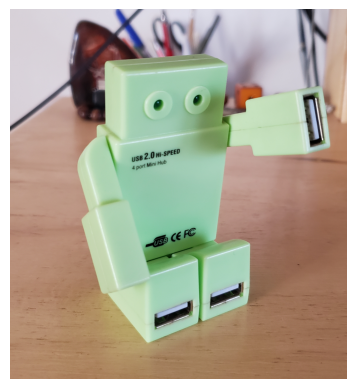

CoordCrom_1.png - coord_cromaticas


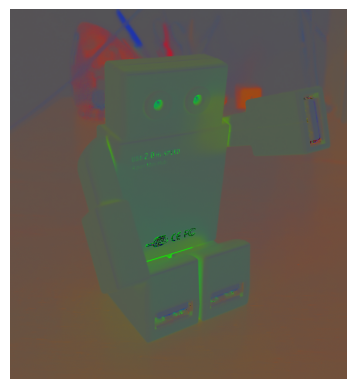

CoordCrom_2.png - original


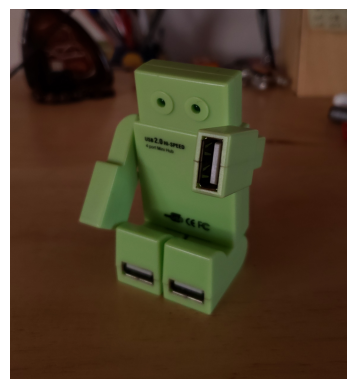

CoordCrom_2.png - coord_cromaticas


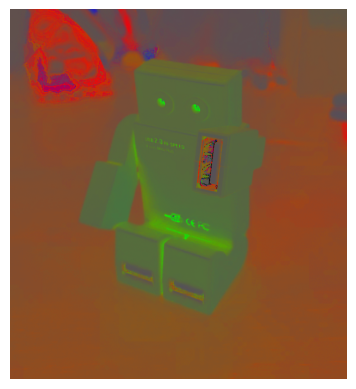

CoordCrom_3.png - original


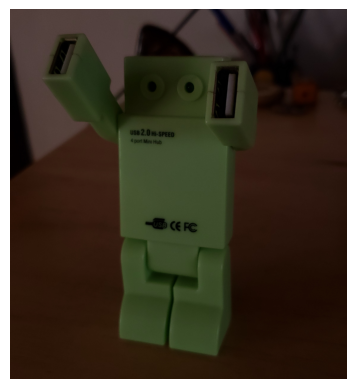

CoordCrom_3.png - coord_cromaticas


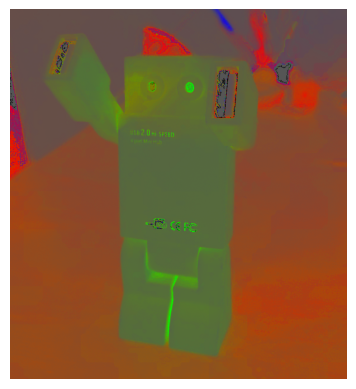

In [155]:
COORD_CROMATICAS_PATH = 'material/coord_cromaticas'

for filename in sorted(os.listdir(COORD_CROMATICAS_PATH)):
    f = os.path.join(COORD_CROMATICAS_PATH, filename)
    img = cv.imread(f)
    print(f'{filename} - original')
    mostrar_img_bgr(img)
    print(f'{filename} - coord_cromaticas')
    mostrar_img_bgr(coord_cromaticas(img))

In [167]:
def white_patch(img):
    B, G, R = cv.split(img)

    B_MAX = np.amax(B)
    G_MAX = np.amax(G)
    R_MAX = np.amax(R)

    B = (B*(255/B_MAX)).astype('uint8')
    G = (G*(255/G_MAX)).astype('uint8')
    R = (R*(255/R_MAX)).astype('uint8')

    return cv.merge([B, G, R])

test_blue.png - original


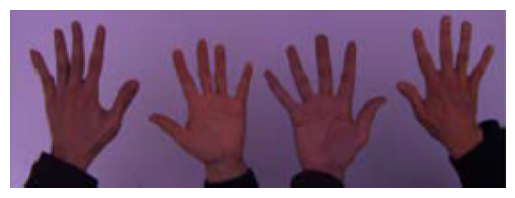

test_blue.png - white_patch


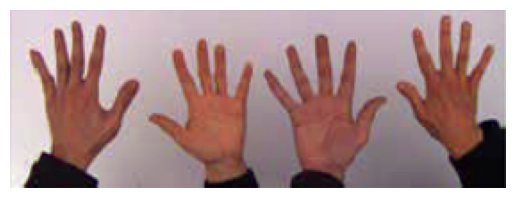

test_green.png - original


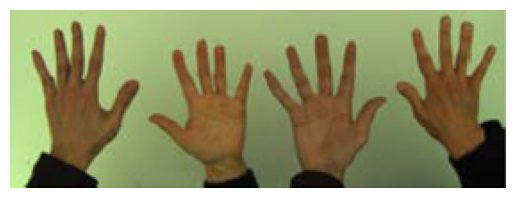

test_green.png - white_patch


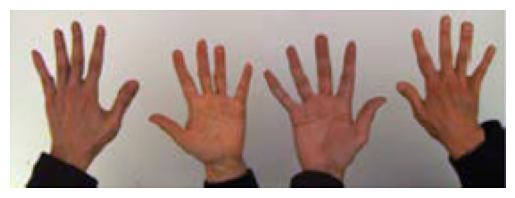

test_red.png - original


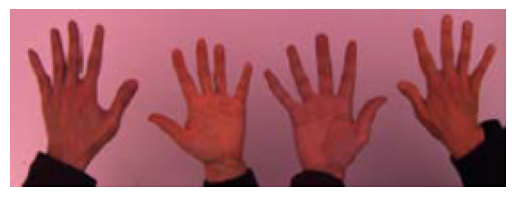

test_red.png - white_patch


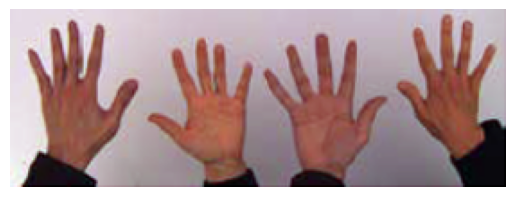

wp_blue.jpg - original


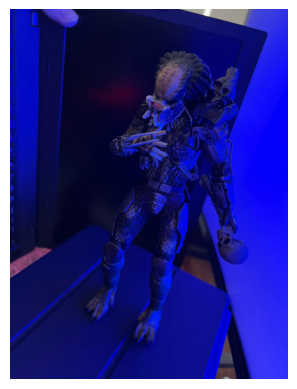

wp_blue.jpg - white_patch


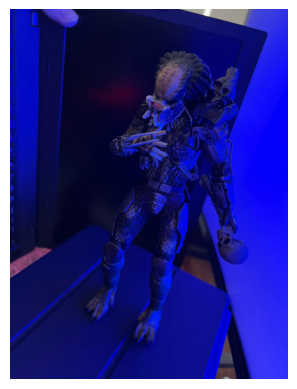

wp_green.png - original


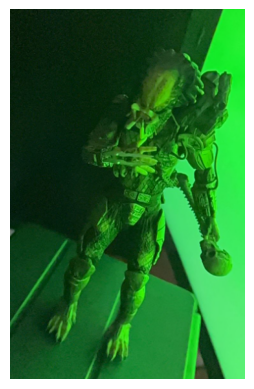

wp_green.png - white_patch


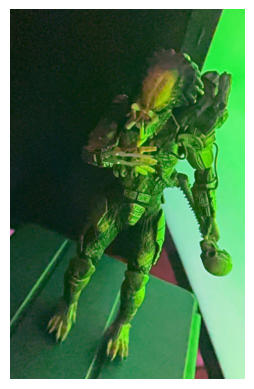

wp_green2.jpg - original


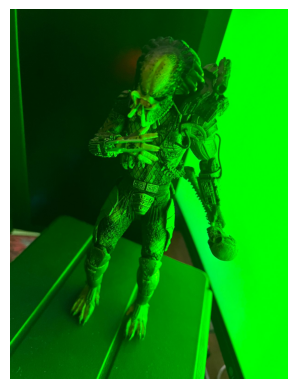

wp_green2.jpg - white_patch


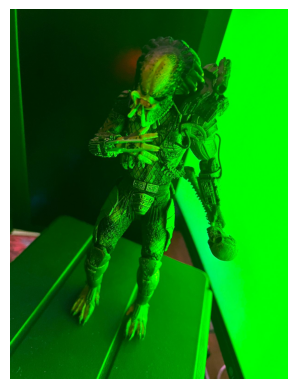

wp_red.png - original


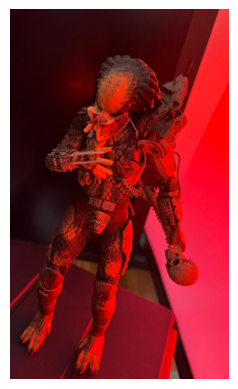

wp_red.png - white_patch


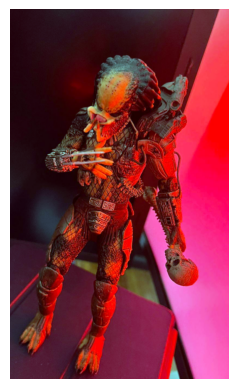

wp_red2.jpg - original


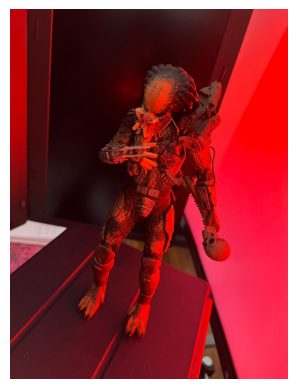

wp_red2.jpg - white_patch


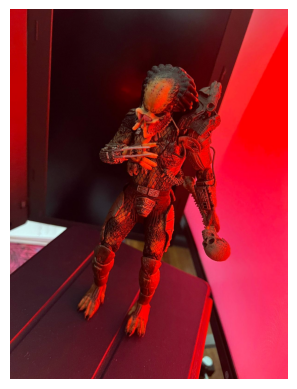

In [168]:
WHITE_PATCH_PATH = 'material/white_patch'

for filename in sorted(os.listdir(WHITE_PATCH_PATH)):
    f = os.path.join(WHITE_PATCH_PATH, filename)
    img = cv.imread(f)
    print(f'{filename} - original')
    mostrar_img_bgr(img)
    print(f'{filename} - white_patch')
    mostrar_img_bgr(white_patch(img))

Al aplicar white patch sobre las imagenes jpg, pareciera que no se obtiene un buen resultado, como si pasa con las imagenes png.